## Name: Daniel Kojo Afealete Fiadjoe
## Student ID: 202291439
## Course: DSCI-6601-001 (Pract Machine Learning 77223)


# Assignment 1

### Import Libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 

# Libraries to split data, create simple linaer regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error


## Question 2

Write some Python code that can load in a .CSV file. Load in the Heart.csv file from the “Introduction to Statistical
Learning” website (https://www.statlearning.com/s/Heart.csv). Load the data into a numpy array and have the code print the
column headings in the dataset and the 25th data row/observation contained in the file.

In [2]:
# Code to load in the Heart.csv and show the rows and columns
data = pd.read_csv('https://www.statlearning.com/s/Heart.csv')

# Code to Load the dataset into numpy array called datanp
datanp = np.array(data)

In [3]:
# Code to display the number of rows and columns
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 303 rows and 15 columns.


In [4]:
# Code to display first 5 rows of the data.
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
# Code to print all the column headings in the dataset.
for col in data.columns:
  print (col)

Unnamed: 0
Age
Sex
ChestPain
RestBP
Chol
Fbs
RestECG
MaxHR
ExAng
Oldpeak
Slope
Ca
Thal
AHD


In [6]:
# Print the 25th data row in the dataset
data.loc[25]

Unnamed: 0            26
Age                   50
Sex                    0
ChestPain     nonanginal
RestBP               120
Chol                 219
Fbs                    0
RestECG                0
MaxHR                158
ExAng                  0
Oldpeak              1.6
Slope                  2
Ca                     0
Thal              normal
AHD                   No
Name: 25, dtype: object

In [7]:
# display of the array in the dataset.
datanp

array([[1, 63, 1, ..., 0.0, 'fixed', 'No'],
       [2, 67, 1, ..., 3.0, 'normal', 'Yes'],
       [3, 67, 1, ..., 2.0, 'reversable', 'Yes'],
       ...,
       [301, 57, 1, ..., 1.0, 'reversable', 'Yes'],
       [302, 57, 0, ..., 1.0, 'normal', 'Yes'],
       [303, 38, 1, ..., nan, 'normal', 'No']], dtype=object)

# Question 3

In this exercise, you will plot some data using the matplotlib library. Create two side-by-side plots. In one, plot the Age column against the MaxHR column in the dataset. In the other, plot the Age column against the RestBP. Set an appropriate label on the overall plot figure as well as the individual sub-plots. Finally, create a third stand-alone plot that contains both of the above plots in one, making sure that the MaxHR and RestBP plots can be clearly differentiated by changing the plot type and creating a plot legend.

#### Plotting 2 individual plots

<ipython-input-8-d34c7d9d1397>:19: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(3)


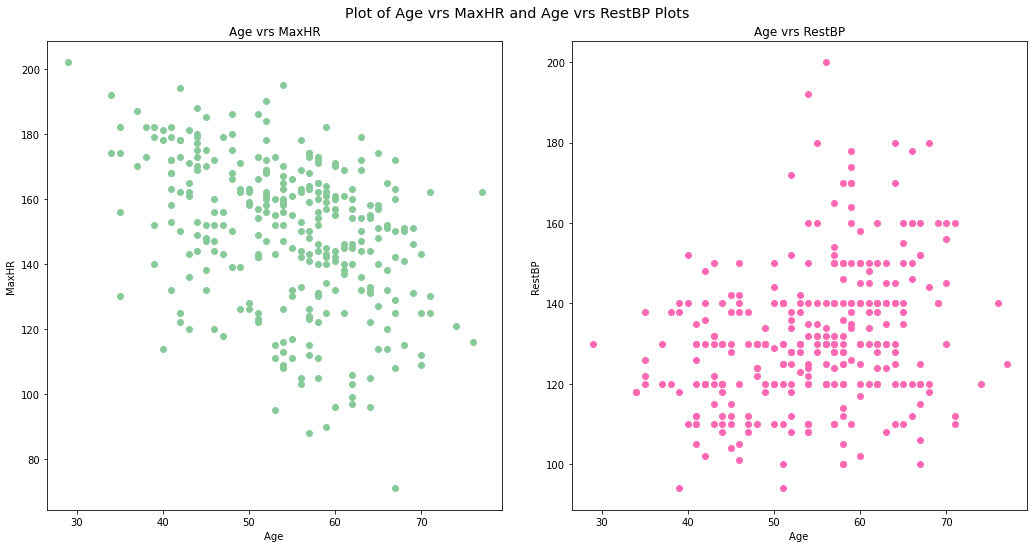

In [8]:
# Plotting the 2 plots using the matplotlib library. That is Age vrs MaxHR and Age vrs RestBP.

plt.figure(figsize=(15,8))

             
plt.subplot(1, 2, 1)
plt.scatter('Age', 'MaxHR', data=data, color = '#88c999')
plt.title("Age vrs MaxHR")
plt.xlabel('Age ')
plt.ylabel('MaxHR ')


plt.subplot(1, 2, 2)
plt.scatter('Age', 'RestBP', data=data, color = 'hotpink')
plt.title("Age vrs RestBP")
plt.xlabel('Age ')
plt.ylabel('RestBP ')

plt.tight_layout(3)
plt.suptitle("Plot of Age vrs MaxHR and Age vrs RestBP Plots", fontsize="x-large")

plt.show()




#### Plotting standalone plot with 2 plots within.

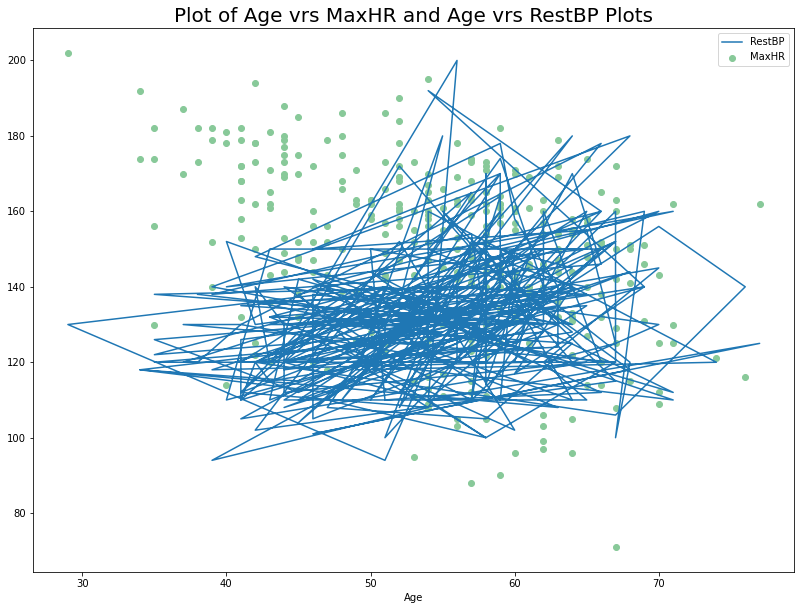

In [9]:
# Codes for standalone plot showing 2 plots of scatter plot and line plot. 
plt.figure(figsize=(30,10))
             
plt.subplot(1, 2, 1)
plt.scatter('Age', 'MaxHR', data=data, color = '#88c999')
plt.plot('Age', 'RestBP', data=data)
plt.xlabel('Age')
plt.legend()
plt.title("Plot of Age vrs MaxHR and Age vrs RestBP Plots", fontsize=20)

plt.show()

## Question 4

Use Sci-kit learn to create a simple linear regression model from the same Heart dataset. Creator a predictor that
can predict the MaxHR using all the other columns. First partition the data into a training and a test set. Try at least 3 different partitions based on training:test ratios of (1) 50:50, (2) 75:25 and (3) 90:10. For each partition, calculate the training error and the testing error (use simple error function based on mean error) after fitting the Linear Regression model. Provide some explanation of what is happening in terms of any changes in the training vs. testing errors across the various ratio cases.

#### Looking at details of data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [11]:
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,303.0,152.000000,87.612784,1.0,76.5,152.0,227.5,303.0
Age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
RestBP,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
Fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
RestECG,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
MaxHR,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
ExAng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [13]:
#null value check for missing values.
data.isna().sum()  

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

From the above, it is clear there are missing values in the variable "Ca" and "Thal". This number of missing data cannot be ignored. The variable "ca" needs to be corrected but the variable "Thal" can be ignored because is categerical variable which be transformed into dummy variables before building the model.

In [14]:
# Checking the variable 'Ca'.
data[data["Ca"].isnull()]

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
166,167,52,1,nonanginal,138,223,0,0,169,0,0.0,1,NaN,normal,No
192,193,43,1,asymptomatic,132,247,1,2,143,1,0.1,2,NaN,reversable,Yes
287,288,58,1,nontypical,125,220,0,0,144,0,0.4,2,NaN,reversable,No
302,303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [15]:
# Treating the missing values by replacing with the mean value of that column.
old_data_1 = data                                   # keeping copy of data.
updated_data = data
updated_data['Ca']=updated_data['Ca'].fillna(updated_data['Ca'].mean())
data = updated_data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          303 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


From the above, the missing values in the variable "Ca" has been corrected. 

In [16]:
# Checking the unquiness of the all variables.
data.nunique()

Unnamed: 0    303
Age            41
Sex             2
ChestPain       4
RestBP         50
Chol          152
Fbs             2
RestECG         3
MaxHR          91
ExAng           2
Oldpeak        40
Slope           3
Ca              5
Thal            3
AHD             2
dtype: int64

The unnamed variable is unique and can be dropped before the linear regression model is built.

In [17]:
# Dropping the variable "Unnamed: 0" as indicated above
old_data_2 = data  # keeping copy of data.
data.drop(columns=["Unnamed: 0"], inplace=True)

data.nunique()

Age           41
Sex            2
ChestPain      4
RestBP        50
Chol         152
Fbs            2
RestECG        3
MaxHR         91
ExAng          2
Oldpeak       40
Slope          3
Ca             5
Thal           3
AHD            2
dtype: int64

In [18]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [19]:
data.corr()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
Age,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359489
Sex,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.092891
RestBP,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098707
Chol,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.118525
Fbs,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143967
RestECG,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127487
MaxHR,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263408
ExAng,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144722
Oldpeak,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294558
Slope,0.161770,0.037533,0.117382,-0.004062,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.109618


## Linear Regression Model Building

#### Divide the data into independent and dependent variables

In [20]:
# Divide the data into independent and dependent variables
ind_vars = data.drop(["MaxHR"], axis=1)   # independent variables
dep_var = data[["MaxHR"]]                 # dependent variables

ind_vars.head()                           # Print

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,0,1.4,1,0.0,normal,No


Above is display of independent variables.

In [21]:
dep_var.head()  # Print

,MaxHR
0,150
1,108
2,129
3,187
4,172


Above is the display of independent variables.

There are three (3) categerical variables (namely - ChestPain, Thal and AHD) that needs to be converted to dummy variables before the modelling can be then for data. 

In [22]:
# Creating dummy variables for the 3 categerical variables. 
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()


,Age,Sex,RestBP,Chol,Fbs,RestECG,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,0,2.3,3,0.0,0,0,1,0,0,0
1,67,1,160,286,0,2,1,1.5,2,3.0,0,0,0,1,0,1
2,67,1,120,229,0,2,1,2.6,2,2.0,0,0,0,0,1,1
3,37,1,130,250,0,0,0,3.5,3,0.0,1,0,0,1,0,0
4,41,0,130,204,0,2,0,1.4,1,0.0,0,1,0,1,0,0


Above is the display of 6 dummy variables created for the data. 

In [23]:
dep_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MaxHR   303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


## Part 1 
### First spliting of data into training (50%) and test data (50%) sets

In [24]:
# Spliting data into training (50%) and test data (50%) sets.

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.5, random_state=1)

In [25]:
# Shape of the train and test sets

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])
print("Number of rows in train data =", y_train.shape[0])
print("Number of rows in test data =", y_test.shape[0])

Number of rows in train data = 151
Number of rows in test data = 152
Number of rows in train data = 151
Number of rows in test data = 152


#### Fitting a linear regression model

In [26]:
# Fitting the linear regression model for the training (50%) and test data (50%) sets
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [27]:
print ("The intercept is", regressor.intercept_)

The intercept is [145.08629771]


In [28]:
print ('The coefficient are', regressor.coef_)

The coefficient are [[-0.52702166  3.86019681  0.13221783  0.03710454  1.26097622 -0.44519288
  -4.45441651 -0.25300197 -5.2907283  -2.13259871  2.77478326  6.15211424
   1.55829588 18.87048387 14.09293057 -4.39477778]]


In [29]:
y_pred = regressor.predict(x_test)
print ('The predicted value is ', y_pred)

The predicted value is  [[157.45978472]
 [148.18006805]
 [158.84297735]
 [121.61703462]
 [153.9668921 ]
 [168.76202868]
 [167.03325878]
 [137.34935307]
 [139.84247603]
 [130.78048063]
 [145.82473123]
 [161.01523843]
 [160.19016662]
 [138.519901  ]
 [166.60188049]
 [168.57994551]
 [149.76768993]
 [159.24056003]
 [163.48526299]
 [139.09166996]
 [158.21416902]
 [133.1813511 ]
 [157.45691203]
 [144.28190259]
 [149.83317244]
 [162.85644119]
 [138.83791439]
 [148.88413761]
 [142.41995843]
 [134.47722498]
 [145.28967041]
 [127.55068471]
 [141.87193763]
 [153.80533339]
 [141.19305756]
 [123.44308342]
 [158.72277511]
 [151.26667971]
 [134.614343  ]
 [145.74731749]
 [153.76939217]
 [148.01443175]
 [147.97105156]
 [137.63169834]
 [126.94249644]
 [165.21339822]
 [153.35492403]
 [166.72333509]
 [173.48725326]
 [134.13097012]
 [163.4285405 ]
 [163.91028745]
 [134.56183364]
 [160.23292537]
 [146.41543603]
 [156.77204251]
 [129.03587005]
 [158.88563359]
 [155.46919396]
 [157.65771453]
 [137.01954764]


In [42]:
# actual_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# print(actual_pred)

#### Evaluate the algorithm

In [30]:
# Evaluating or calculating the metrics and displaying them.
print ('Mean Absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print ('Mean squared error:', metrics.mean_squared_error(y_test, y_pred, squared=True))
print ('Root Mean squared error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute error: 15.0254336413446
Mean squared error: 376.76275647699526
Root Mean squared error: 19.410377545967396


In [44]:
# Keeping results in a variable
mae5050 = metrics.mean_absolute_error(y_test, y_pred)
mse5050 = metrics.mean_squared_error(y_test, y_pred, squared=True)
rmse5050 = metrics.mean_squared_error(y_test, y_pred, squared=False)

## Part 2
### First spliting of data into training (75%) and test data (25%) sets

In [47]:
# Spliting data into training (75%) and test data (25%) sets.

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.25, random_state=1)

In [48]:
# Shape of the train and test sets

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])
print("Number of rows in train data =", y_train.shape[0])
print("Number of rows in test data =", y_test.shape[0])

Number of rows in train data = 227
Number of rows in test data = 76
Number of rows in train data = 227
Number of rows in test data = 76


#### Fitting a linear regression model

In [49]:
# Fitting the linear regression model for the training (75%) and test data (25%) sets
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [50]:
print ("The intercept is", regressor.intercept_)

The intercept is [172.66013717]


In [51]:
print ('The coefficient are', regressor.coef_)

The coefficient are [[-0.87167798  1.43477136  0.1510971   0.01825345  5.51742771 -0.95452007
  -5.52181268  0.9612542  -7.87616602  0.18432209  2.7989238   4.13287437
   6.23820165 16.77397426 13.33148954 -8.00491205]]


In [52]:
y_pred = regressor.predict(x_test)
print ('The predicted value is ', y_pred)

The predicted value is  [[162.54023894]
 [147.1062943 ]
 [155.45276195]
 [120.71119829]
 [148.78396003]
 [172.38423856]
 [172.10941047]
 [133.01136511]
 [145.74752509]
 [120.93831243]
 [144.63817874]
 [159.82709153]
 [155.21407129]
 [131.09926047]
 [163.60833047]
 [176.83754076]
 [145.59493735]
 [163.00202027]
 [167.37090011]
 [133.17538984]
 [154.86138695]
 [131.83334945]
 [156.79703387]
 [149.31238722]
 [148.25356693]
 [173.22784084]
 [144.87512176]
 [150.85476848]
 [143.80217526]
 [132.82650375]
 [143.81077512]
 [127.48577837]
 [142.96269844]
 [161.64969009]
 [135.08556112]
 [121.73865615]
 [167.66223427]
 [152.37688356]
 [132.67870333]
 [144.87563429]
 [155.0188081 ]
 [142.34981725]
 [150.92245487]
 [137.97197848]
 [131.83948235]
 [178.66526455]
 [145.07177346]
 [172.75506625]
 [178.55537149]
 [138.56908359]
 [159.80681229]
 [161.05923653]
 [138.83028693]
 [162.78838669]
 [139.84729568]
 [158.5726807 ]
 [133.77030626]
 [156.63673605]
 [149.78111792]
 [167.88703444]
 [130.10531738]


#### Evaluate the algorithm

In [55]:
# Evaluating or calculating the metrics and displaying them.
print ('Mean Absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print ('Mean squared error:', metrics.mean_squared_error(y_test, y_pred, squared=True))
print ('Root Mean squared error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute error: 14.557058704590277
Mean squared error: 359.87057126167997
Root Mean squared error: 18.970254907662152


In [56]:
# Keeping results in a variable
mae7525 = metrics.mean_absolute_error(y_test, y_pred)
mse7525 = metrics.mean_squared_error(y_test, y_pred, squared=True)
rmse7525 = metrics.mean_squared_error(y_test, y_pred, squared=False)

## Part 3

### First spliting of data into training (90%) and test data (10%) sets

In [57]:
# Spliting data into training (90%) and test data (10%) sets.

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.10, random_state=1)

In [58]:
# Shape of the train and test sets

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])
print("Number of rows in train data =", y_train.shape[0])
print("Number of rows in test data =", y_test.shape[0])

Number of rows in train data = 272
Number of rows in test data = 31
Number of rows in train data = 272
Number of rows in test data = 31


#### Fitting a linear regression model

In [59]:
# Fitting the linear regression model for the training (75%) and test data (25%) sets
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [60]:
print ("The intercept is", regressor.intercept_)

The intercept is [170.84925848]


In [61]:
print ('The coefficient are', regressor.coef_)

The coefficient are [[-0.82496715  1.74109573  0.13827588  0.03215715  3.82255152 -0.25874941
  -8.80188544 -0.37930585 -5.74395412  0.08906314  3.29001685  7.00779945
   8.28576312 10.79653614  8.72227747 -6.30072826]]


In [62]:
y_pred = regressor.predict(x_test)
print ('The predicted value is ', y_pred)

The predicted value is  [[162.0905965 ]
 [147.69477114]
 [156.24903587]
 [127.77315533]
 [151.24110557]
 [172.46886147]
 [170.04848505]
 [135.24579945]
 [144.61452951]
 [121.49537377]
 [144.07901254]
 [161.19582594]
 [159.65338962]
 [129.93033974]
 [165.67858131]
 [174.3536468 ]
 [150.34211827]
 [160.15383582]
 [166.33665483]
 [133.65442728]
 [158.76975559]
 [129.52133012]
 [155.34858394]
 [151.80274175]
 [144.82509814]
 [170.68149118]
 [140.26434514]
 [145.3875382 ]
 [145.27456729]
 [127.81757541]
 [148.01211334]]


#### Evaluate the algorithm

In [63]:
# Evaluating or calculating the metrics and displaying them.
print ('Mean Absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print ('Mean squared error:', metrics.mean_squared_error(y_test, y_pred, squared=True))
print ('Root Mean squared error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute error: 13.220295962205572
Mean squared error: 286.01884104920157
Root Mean squared error: 16.91209156341112


In [64]:
# Keeping results in a variable
mae9010 = metrics.mean_absolute_error(y_test, y_pred)
mse9010 = metrics.mean_squared_error(y_test, y_pred, squared=True)
rmse9010 = metrics.mean_squared_error(y_test, y_pred, squared=False)

In [89]:
# Printing metrics to compare results
print ("Ratio", "MAE", "     MSE     ", " RMSE    ")
print ("")
print ("50:50", round(mae5050, 5), round(mse5050, 5), round(rmse5050, 5))
print ("75:25", round(mae7525, 5), round(mse7525, 5), round(rmse7525, 5))
print ("90:10", round(mae9010, 5), round(mse9010, 5), round(rmse9010, 5))

Ratio MAE      MSE       RMSE    

50:50 15.02543 376.76276 19.41038
75:25 14.55706 359.87057 18.97025
90:10 13.2203 286.01884 16.91209


### Explanation on changes in errors after changes in the ratios

The ratios provided and used in the 3 linear regression models varied the amount of data that was used to build and test the models. In the first model in part 1 above, it was 50% split, the other 2 parts had more training data than the test data as in 75:25 and 90:10. 
From the list of errors obtained, the errors were reducing as the training data was increased. This shows that more training data leads to reduced errors. 
The lesser the mean square error, the better the regression model is. When the linear regression model is trained using a given set of observations, the model with the least mean sum of mean square error is selected as the best model. In this exercise, the model with ratio of 90:10 is the model with least error close to zero. This will taken as the best model.